In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import subprocess
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from arch import arch_model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# subprocess.run("indicators NBET -p 5y -o nbet_5y.csv")
nbet = pd.read_csv("nbet_5y.csv")
nbet["Date"] = nbet["Date"].str.slice(start=0,stop=10)
nbet["returns"] = nbet["close"].pct_change()
window=50
nbet["volatility"] = nbet["close"].rolling(window=window).std()
nbet["Date"] = pd.to_datetime(nbet["Date"])
nbet.head()

,Date,open,high,low,close,volume,dividends,stock splits,capital gains,sma_50,...,hi_lo,hi_close,lo_close,true_range,ATR,obv,%K,%D,returns,volatility
0,2022-04-07,24.730200,24.735096,24.651847,24.735096,202000,0.0,0.0,0.0,NaN,...,0.083249,NaN,NaN,0.083249,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-08,24.632257,24.632257,24.632257,24.632257,100,0.0,0.0,0.0,NaN,...,0.000000,0.102839,0.102839,0.102839,NaN,0.004158,NaN,NaN,-0.004158,NaN
2,2022-04-11,24.524525,24.524525,24.386427,24.386427,500,0.0,0.0,0.0,NaN,...,0.138098,0.107732,0.245831,0.245831,NaN,0.014138,NaN,NaN,-0.009980,NaN
3,2022-04-12,24.142551,24.142551,24.054403,24.077909,2500,0.0,0.0,0.0,NaN,...,0.088147,0.243876,0.332024,0.332024,NaN,0.026789,NaN,NaN,-0.012651,NaN
4,2022-04-13,24.214048,24.214048,24.214048,24.214048,100,0.0,0.0,0.0,NaN,...,0.000000,0.136139,0.136139,0.136139,NaN,0.032443,NaN,NaN,0.005654,NaN


In [3]:
nbet.columns

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'capital gains', 'sma_50', 'ema_50', 'macd',
       'signal_line', 'macd_hist', 'rsi', 'bb_upper', 'bb_lower', 'roc',
       'hi_lo', 'hi_close', 'lo_close', 'true_range', 'ATR', 'obv', '%K', '%D',
       'returns', 'volatility'],
      dtype='object')

<Axes: >

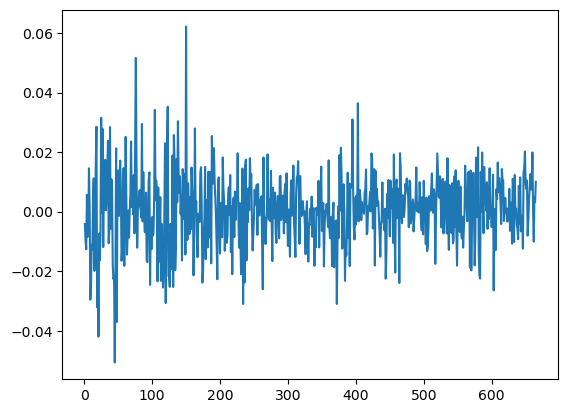

In [4]:
nbet["returns"].plot()

In [21]:
garch = arch_model(x=nbet["Date"].iloc[1:],y=10*nbet["returns"].iloc[1:],mean="Zero",vol="GARCH",p=1,q=1,o=1)
garch_results=garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1692.6611654210756
Iteration:      2,   Func. Count:     12,   Neg. LLF: 111483.805573443
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1643.4642825221017
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1659.0150414455497
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1645.4539725452867
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1642.0795600419126
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1638.9004439306955
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1638.8530907162549
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1638.845205570942
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1638.8451940125033
Iteration:     11,   Func. Count:     63,   Neg. LLF: 1638.8451940141072
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1638.8451940125033
            Iterations: 11
            Function evaluations: 63
            Gradient evalua

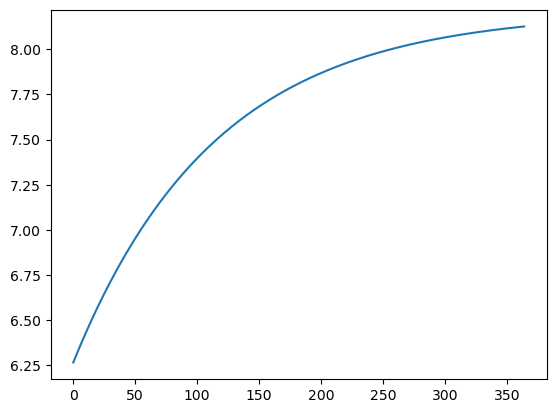

In [39]:
forecast = garch_results.forecast(horizon=365).variance.transpose().iloc[:,0].tolist()
plt.plot(range(0,len(forecast)), forecast)
plt.show()

In [39]:
nbet["volatility"].iloc[49:].values

array([1.16504861, 1.1440798 , 1.12269984, 1.09982777, 1.07763709,
       1.04594839, 1.02322737, 1.00632634, 0.97029837, 0.92254261,
       0.9059914 , 0.90276542, 0.89721247, 0.89490665, 0.89295236,
       0.88795002, 0.88898952, 0.89295718, 0.89175543, 0.87155835,
       0.86584959, 0.86437482, 0.86094869, 0.85462008, 0.84165075,
       0.82182762, 0.82225253, 0.85641765, 0.91063558, 0.94508284,
       0.9793762 , 1.01261292, 1.04975865, 1.09079094, 1.12964521,
       1.16274366, 1.21567197, 1.26518408, 1.326463  , 1.37801474,
       1.42214221, 1.45444183, 1.48739839, 1.51266624, 1.53083663,
       1.54894401, 1.55955032, 1.56672908, 1.56616823, 1.54188253,
       1.51682052, 1.49643071, 1.47098201, 1.44903291, 1.43468653,
       1.43125499, 1.41900802, 1.40100907, 1.3854722 , 1.36554115,
       1.3328765 , 1.29271864, 1.26597306, 1.24100607, 1.20319201,
       1.15687316, 1.11261341, 1.06980563, 1.03862353, 1.01328082,
       0.99311504, 0.99905274, 1.013542  , 1.00716998, 0.98986

In [56]:
lr.coef_.item()

-0.020958977752252767

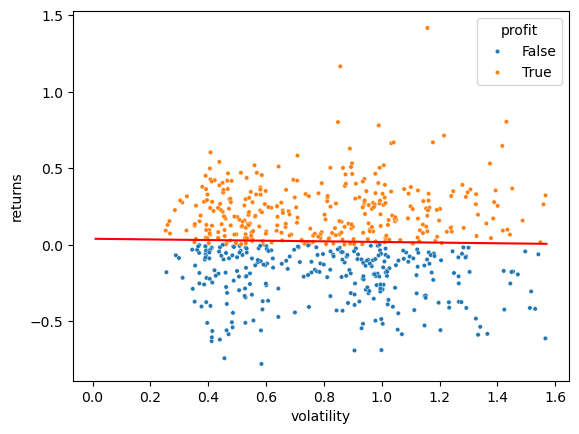

In [59]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

nbet["profit"] = nbet["returns"].apply(lambda x: x > 0 )
lr = LinearRegression()
lr.fit(nbet["volatility"].iloc[49:].values.reshape(-1,1), nbet["returns"].iloc[49:].values.reshape(-1,1))

fig,ax = plt.subplots(1,1)
sns.scatterplot(data=nbet,x="volatility", y="returns", s=10, hue = "profit", ax=ax)
i=0
x=[]
while i < nbet["volatility"].max():
    i = i + 0.01
    x.append(i)
y=[]
for i in x:
    y.append((lr.coef_.item() * i + lr.intercept_.item()))
ax.plot(x,y, c='r')
plt.show()

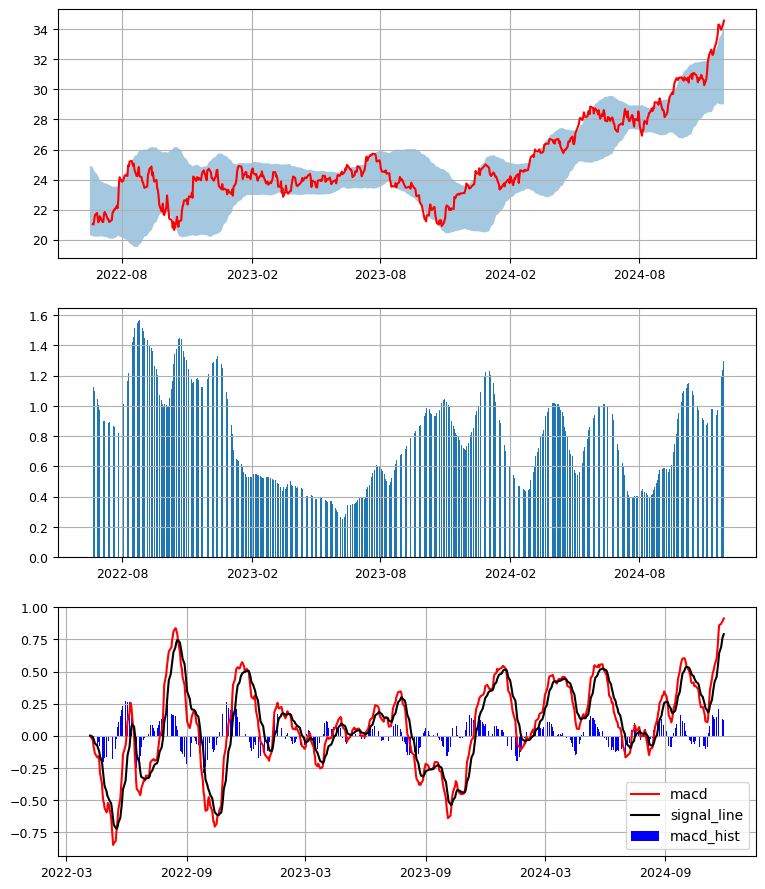

In [5]:
tsa = seasonal_decompose(nbet["close"], period=182)

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(9,11)

nbet["returns"] = nbet["close"].diff()
window=50
nbet["volatility"] = nbet["close"].rolling(window=window).std()

ax1.plot(nbet["Date"].iloc[50:],nbet["close"].iloc[50:],c='r')
ax1.fill_between(x=nbet["Date"], y1=nbet["bb_lower"], y2=nbet["bb_upper"], alpha=0.4)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.tick_params(labelsize=9)
ax1.grid(True)


ax2.bar(nbet["Date"],nbet["volatility"])
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.tick_params(labelsize=9)
ax2.grid(True)


# ax3.scatter(nbet["Date"],nbet["returns"],s=5)
ax3.plot(nbet["Date"],nbet["macd"], label="macd", color='red')
ax3.plot(nbet["Date"],nbet["signal_line"],label="signal_line", color='black')
ax3.bar(nbet["Date"],nbet["macd_hist"], label="macd_hist", color="blue")
plt.legend()
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.tick_params(labelsize=9)

ax3.grid(True)
plt.show()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_67432\3476550625.py:1: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, [1,2,3,4,5,6])


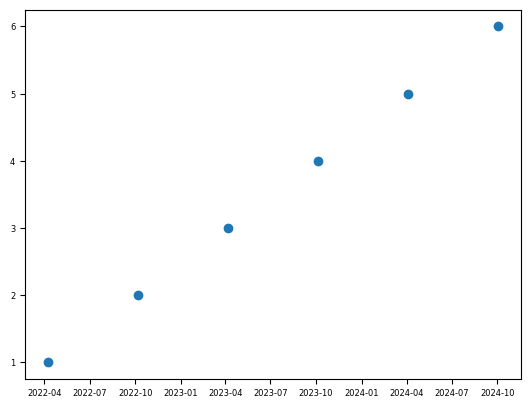

In [33]:
plt.plot_date(dates, [1,2,3,4,5,6])
plt.tick_params(labelsize=6)

In [20]:
dates.dtype

dtype('float64')

In [ ]:
tsa = seasonal_decompose(nbet)
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(9,10)
ax1.plot()